#**Team 4**

#**Programmer requirements:**
<li>Get the data
<li>Upload it to your tool of choice
<li>Run clustering algorithm (but other than K-means) on a modified subset of variables (at least 3 different variables) (+1 point)
<li>Run PCA to visualize your results (+1 point)
<li>Run t-SNE to visualize your results (+1 point)
<li>Provide results in digestible manner to the rest of the team (+2 points)

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')



# I. Data Input preparation for Speeddating users

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1wmtMusQYWSMK7tVspqUUdrDBCM80BRCT', encoding='ISO-8859-1')

In [ ]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
iid,8378.0,283.675937,158.583367,1.0,154.0,281.0,407.0,552.0
id,8377.0,8.960248,5.491329,1.0,4.0,8.0,13.0,22.0
gender,8378.0,0.500597,0.500029,0.0,0.0,1.0,1.0,1.0
idg,8378.0,17.327166,10.940735,1.0,8.0,16.0,26.0,44.0
condtn,8378.0,1.828837,0.376673,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
attr5_3,2016.0,6.810020,1.507341,2.0,6.0,7.0,8.0,10.0
sinc5_3,2016.0,7.615079,1.504551,2.0,7.0,8.0,9.0,10.0
intel5_3,2016.0,7.932540,1.340868,4.0,7.0,8.0,9.0,10.0
fun5_3,2016.0,7.155258,1.672787,1.0,6.0,7.0,8.0,10.0


In [ ]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [ ]:
df.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [ ]:
# counting null values
df.isnull().sum().values

array([   0,    1,    0,    0,    0,    0,    0,    0, 1846,    0,    0,
         10,    0,  158,    0,  104,   73,   89,   89,   89,   98,  107,
        129,    0,  212,  287,  306,  360,  722, 1076,  250,  318,  385,
         95,   63,   82, 3464, 5245, 4795,   63,   79,   79,   79, 1064,
       4099,   79,   97,   79,   89,  138,   79,   79,   79,   79,   79,
         79,   79,   79,   79,   79,   79,   79,   79,   79,   79,   79,
         79,  101, 6578,   79,   79,   79,   89,   99,  121, 1889, 1889,
       1889, 1889, 1889, 1911,   79,   79,   79,   79,   89,   89,  105,
        105,  105,  105,  105, 3472, 3472, 3472, 3472, 3472,    0,  202,
        277,  296,  350,  712, 1067,  240,  309,  375, 1173, 4282, 4282,
       4282, 4282, 4282, 4282, 4378, 4378, 4378, 4378, 4378,  915,  915,
        945, 6394, 6423, 6394, 6394, 6423, 6404,  933,  915,  915,  915,
        915,  915, 2603, 2603, 2603, 2603, 2603, 2603, 2603, 2603, 2603,
       2603, 2603, 2603,  915,  915,  915,  915,  9

In [ ]:
data1 = df.copy()

data1['gender'] = data1['gender'].map({0:'Female', 1:'Male'})

my_report_gender = sv.compare_intra(data1,
                                    data1["gender"] == "Male",
                                    ["Male", "Female"],
                                    pairwise_analysis="off")

                                             |          | [  0%]   00:00 -> (? left)

# II. The number of dates and matches per person - criterion for our market investigation

In [ ]:
print(100*df['match'].value_counts() / df.shape[0]) # 16.47% of the dates are labeled as matching

0    83.528288
1    16.471712
Name: match, dtype: float64


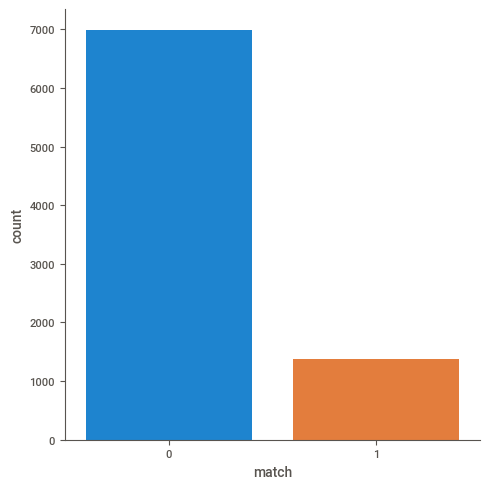

In [ ]:
sns.catplot(data = df, x = "match", kind = "count")
plt.show()

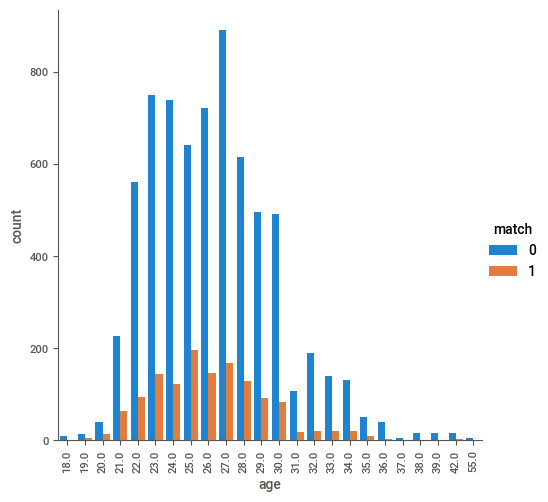

In [ ]:
sns.catplot(data = df, x = "age", hue = "match", kind = "count")
plt.xticks(rotation=90)
plt.show()

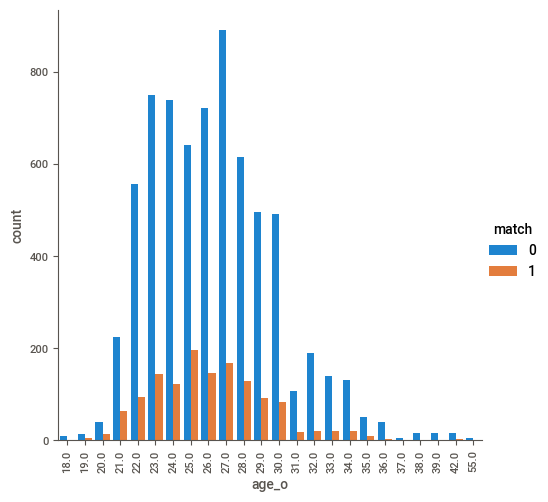

In [ ]:
sns.catplot(data = df, x = "age_o", hue = "match", kind = "count")
plt.xticks(rotation=90)
plt.show()

# III. Dataset preparation for the clustering

** We would like to group participants and get to know who our potential clients are.**

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1wmtMusQYWSMK7tVspqUUdrDBCM80BRCT', encoding='ISO-8859-1')

In [ ]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [ ]:
# Taking group of people after match

In [ ]:
df = df[(df['match'] == 1)]

In [ ]:
data_subset = df.loc[:,['iid','attr1_1','intel1_1','fun1_1',
                               'sports', 'art','movies', 'reading','music', 'gaming', 'age_o', 'income','imprelig']]

In [ ]:
# Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.
# Waves 6-9: Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important):**

In [ ]:
data_subset

,iid,attr1_1,intel1_1,fun1_1,sports,art,movies,reading,music,gaming,age_o,income,imprelig
2,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,22.0,"69,487.00",4.0
3,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,23.0,"69,487.00",4.0
4,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,24.0,"69,487.00",4.0
8,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,28.0,"69,487.00",4.0
13,2,45.0,25.0,20.0,3.0,6.0,8.0,10.0,8.0,5.0,23.0,"65,929.00",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,26.0,NaN,1.0
8360,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,NaN,1.0
8362,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,NaN,1.0
8363,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,27.0,NaN,1.0


In [ ]:
#https://www.kaggle.com/code/tolgaik/speed-dating-classification

In [ ]:
#https://www.kaggle.com/search?q=speed+dating+notebookLanguage%3APython

In [ ]:
data_subset.isnull().values.any() # if 0 values are find in the data

True

In [ ]:
data_subset.isna().sum() # how many #na are in our input data


iid           0
attr1_1      15
intel1_1     15
fun1_1       17
sports       15
art          15
movies       15
reading      15
music        15
gaming       15
age_o        18
income      644
imprelig     15
dtype: int64

In [ ]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 2 to 8371
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       1380 non-null   int64  
 1   attr1_1   1365 non-null   float64
 2   intel1_1  1365 non-null   float64
 3   fun1_1    1363 non-null   float64
 4   sports    1365 non-null   float64
 5   art       1365 non-null   float64
 6   movies    1365 non-null   float64
 7   reading   1365 non-null   float64
 8   music     1365 non-null   float64
 9   gaming    1365 non-null   float64
 10  age_o     1362 non-null   float64
 11  income    736 non-null    object 
 12  imprelig  1365 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 150.9+ KB


In [ ]:
null_variable= ['attr1_1','intel1_1','fun1_1',
                               'sports', 'art','movies', 'reading','music', 'gaming', 'age_o', 'income','imprelig']

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


In [ ]:
# Feeding null values by 'most_frequent'
#uzupełnić puste most frequent
impute_it = SimpleImputer(strategy='most_frequent')
impute_data = impute_it.fit_transform(data_subset[null_variable])
data_subset[null_variable] = impute_data

In [ ]:
print(data_subset.isna().sum().sum()) # sprawdzanie czy w danych jest isna

0


In [ ]:
print(data_subset.isnull().values.any()) # sprawdzanie czy w danych jest isnull

False


In [ ]:
data_subset

,iid,attr1_1,intel1_1,fun1_1,sports,art,movies,reading,music,gaming,age_o,income,imprelig
2,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,22.0,"69,487.00",4.0
3,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,23.0,"69,487.00",4.0
4,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,24.0,"69,487.00",4.0
8,1,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,28.0,"69,487.00",4.0
13,2,45.0,25.0,20.0,3.0,6.0,8.0,10.0,8.0,5.0,23.0,"65,929.00",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,26.0,"55,080.00",1.0
8360,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,"55,080.00",1.0
8362,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,"55,080.00",1.0
8363,552,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,27.0,"55,080.00",1.0


Removing duplicates

In [ ]:
#Cleanest way to get rid of duplicates
#Note that if you dropped duplicates in a subset without iid, you could lose "false duplicates" - people with identical preferences
data_subset = df.loc[:, ['iid','attr1_1','intel1_1','fun1_1',
                               'sports', 'art','movies', 'reading','music', 'gaming','age_o', 'income','imprelig']].copy()
data_subset.drop(columns='iid', inplace=True)

In [ ]:
data_subset.income.fillna("0.00", inplace=True)
data_subset.income = data_subset.income.str.replace((".00"), (""))
data_subset.income = data_subset.income.str.replace((","), (""))
data_subset.income = data_subset.income.astype(int)

In [ ]:
data_subset.income.mean(), data_subset.income.min(),data_subset.income.max()

(23788.758695652174, 0, 97972)

In [ ]:
data_subset.age_o.min(), data_subset.age_o.max()

(19.0, 42.0)

In [ ]:
data_subset

,attr1_1,intel1_1,fun1_1,sports,art,movies,reading,music,gaming,age_o,income,imprelig
2,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,22.0,69487,4.0
3,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,23.0,69487,4.0
4,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,24.0,69487,4.0
8,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,28.0,69487,4.0
13,45.0,25.0,20.0,3.0,6.0,8.0,10.0,8.0,5.0,23.0,65929,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8357,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,26.0,0,1.0
8360,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,0,1.0
8362,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,0,1.0
8363,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,27.0,0,1.0


In [ ]:
data_subset.info() # Jaki mamy typ danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 2 to 8371
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   attr1_1   1365 non-null   float64
 1   intel1_1  1365 non-null   float64
 2   fun1_1    1363 non-null   float64
 3   sports    1365 non-null   float64
 4   art       1365 non-null   float64
 5   movies    1365 non-null   float64
 6   reading   1365 non-null   float64
 7   music     1365 non-null   float64
 8   gaming    1365 non-null   float64
 9   age_o     1362 non-null   float64
 10  income    1380 non-null   int64  
 11  imprelig  1365 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 140.2 KB


Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler # Skalowanie wszystkich wybranych atrybutów
?StandardScaler
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset.fillna(0)) # we fill 0
data_subset_scaled

array([[-0.55079148, -0.03677506, -0.42119725, ..., -0.84307202,
         1.75601318,  0.20090752],
       [-0.55079148, -0.03677506, -0.42119725, ..., -0.6174681 ,
         1.75601318,  0.20090752],
       [-0.55079148, -0.03677506, -0.42119725, ..., -0.39186419,
         1.75601318,  0.20090752],
       ...,
       [ 3.38885384, -0.74851039, -0.42119725, ..., -0.6174681 ,
        -0.91411338, -0.89350978],
       [ 3.38885384, -0.74851039, -0.42119725, ...,  0.28494755,
        -0.91411338, -0.89350978],
       [ 3.38885384, -0.74851039, -0.42119725, ..., -0.16626028,
        -0.91411338, -0.89350978]])

In [ ]:
# what are the scaling parameters?
scaler.mean_, scaler.var_

(array([2.26894058e+01, 2.02583478e+01, 1.78062826e+01, 6.48188406e+00,
        6.80072464e+00, 7.74637681e+00, 7.68550725e+00, 7.85797101e+00,
        3.91811594e+00, 2.57369565e+01, 2.37887587e+04, 3.44927536e+00]),
 array([1.94899682e+02, 4.93517955e+01, 4.43906763e+01, 7.28010660e+00,
        5.69144875e+00, 3.77625499e+00, 3.88080445e+00, 4.08562487e+00,
        6.98532399e+00, 1.96474748e+01, 6.77241290e+08, 7.51409368e+00]))

In [ ]:
# Something is not working
data_subset_scaled.mean(axis=0)

array([-8.23817665e-17,  3.55271368e-16, -1.87933405e-16, -9.39667024e-17,
        1.13274929e-16, -8.75306269e-17, -8.88178420e-17, -4.11908832e-17,
       -4.63397436e-17, -1.54465812e-16,  1.02977208e-17, -9.26794873e-17])

# IV. Gaussian Mixture algorithm





In [ ]:
# perform  clustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

?GaussianMixture

# V. How many clusters to choose?

In [ ]:
#Use silhouette score
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

#silhouette_score

from sklearn.metrics import silhouette_score
import pandas as pd

# load dataset
# df = pd.read_csv('dataset.csv')
range_n_components = (range(2,4))
# calculate Silhouette score for different k values
silhouette_scores = []
for n_components in range_n_components:
      model = GaussianMixture(n_components=n_components, random_state=1,  reg_covar=1e-6)
      labels = model.fit_predict(data_subset_scaled)
      silhouette_scores.append(silhouette_score(data_subset_scaled, labels))

# find the best value of k based on the Silhouette score
best_k = silhouette_scores.index(max(silhouette_scores))+2

print(f"The optimal number of clusters is {best_k} with a Silhouette score of {max(silhouette_scores)}")
print("For n_clusters = {}, silhouette score is {})".format(n_components, silhouette_scores))

The optimal number of clusters is 2 with a Silhouette score of 0.20513485569162387
For n_clusters = 3, silhouette score is [0.20513485569162387, 0.19590445990703623])


In [ ]:
# perform AgglomerativeClustering clustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# perform hierarchical clustering
model = GaussianMixture(n_components=2,  random_state=1, max_iter=500, reg_covar=1e-6)
labels = model.fit_predict(data_subset_scaled)

In [ ]:
pd.Series(labels).value_counts()

1    1074
0     306
dtype: int64

Clusters viz

In [ ]:
df_viz = pd.DataFrame(data_subset_scaled,
                      columns = data_subset.columns)

df_viz['labels'] = labels
df_viz_ = df_viz.groupby('labels').mean().reset_index().melt(id_vars = ['labels'])

import plotly.express as px
fig = px.line_polar(df_viz_,
                    r = "value",
                    theta = "variable",
                    line_close = True,
                    color = "labels",
                    color_discrete_sequence = px.colors.sequential.Plasma_r)


fig.update_layout(polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-1.2, 1.2]
    )),
  showlegend = True
)

fig.show()

# VI.PCA

PCA 3D

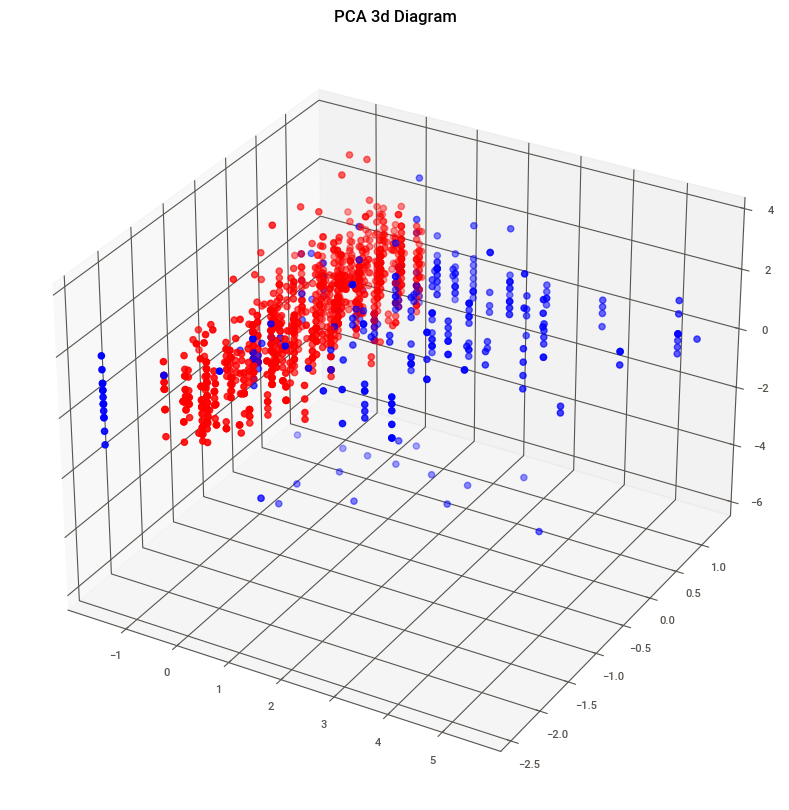

In [ ]:
# Creating figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_viz.attr1_1,
             df_viz.sports,
             df_viz.age_o,
             color = df_viz.labels.replace([0, 1], ['b', 'r']))
plt.title("PCA 3d Diagram")

# show plot
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# perform PCA
pca = PCA(n_components=2) #We can generate more than 2 components (up to the #variables in our dataset)
data_subset_pca = pca.fit_transform(data_subset_scaled)
#data_subset_pca #Transformed dataset

In [ ]:
#Getting it back into Pandas data frame
data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2']),
                           pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tf

,PC1,PC2,labels
0,0.472737,0.324604,1
1,0.470650,0.382995,1
2,0.468563,0.441386,1
3,0.460214,0.674951,1
4,-0.519848,0.009354,0
...,...,...,...
1375,0.190350,-2.231455,0
1376,0.196611,-2.406628,0
1377,0.196611,-2.406628,0
1378,0.188263,-2.173064,0


In [ ]:
data_subset

,attr1_1,intel1_1,fun1_1,sports,art,movies,reading,music,gaming,age_o,income,imprelig
2,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,22.0,69487,4.0
3,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,23.0,69487,4.0
4,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,24.0,69487,4.0
8,15.0,20.0,15.0,9.0,1.0,10.0,6.0,9.0,1.0,28.0,69487,4.0
13,45.0,25.0,20.0,3.0,6.0,8.0,10.0,8.0,5.0,23.0,65929,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8357,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,26.0,0,1.0
8360,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,0,1.0
8362,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,23.0,0,1.0
8363,70.0,15.0,15.0,8.0,10.0,9.0,8.0,10.0,1.0,27.0,0,1.0


In [ ]:
data_subset.std(axis=0)

attr1_1        13.836990
intel1_1        6.735570
fun1_1          6.400820
sports          2.626478
art             2.289980
movies          1.775783
reading         1.808210
music           1.856622
gaming          2.626135
age_o           3.323475
income      26033.294075
imprelig        2.733123
dtype: float64

In [ ]:
data_subset.mean(axis=0)

attr1_1        22.938740
intel1_1       20.480967
fun1_1         18.028371
sports          6.553114
art             6.875458
movies          7.831502
reading         7.769963
music           7.944322
gaming          3.961172
age_o          26.077093
income      23788.758696
imprelig        3.487179
dtype: float64

PCA 2D

<Axes: xlabel='PC1', ylabel='PC2'>

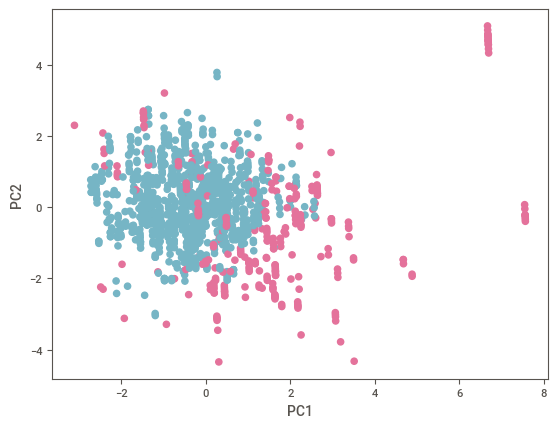

In [ ]:
import matplotlib.pyplot as plt

#You can add component vectors to your plot to better interpret the outcomes
#Note however, that this plot is still very hard to interpret for a layman :)
data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0, 1 ], ['#e4729b','#76b5c5']))

In [ ]:
# To better understand what happened, we can check eigenvectors/coefficients/loadings/components - that is, vectors used for obtaining our new coordinates
# 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'
print(pca.components_)

[[ 0.31039141 -0.35154057 -0.18541507  0.17789454 -0.45517386 -0.48255269
  -0.32887442 -0.39012535  0.04094596 -0.00925107 -0.09975866 -0.04405367]
 [-0.39656536  0.24502378 -0.1540191  -0.48346084 -0.09703746 -0.19119732
  -0.10709924 -0.36256435 -0.44137456  0.2588216   0.16372641  0.21849645]]


# VII.T-SNE

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
?TSNE

# Generate sample data
X, y = make_blobs(n_samples=1000, n_features=28 , centers=2, random_state=42)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.231482,-9.471128,2.615692,-5.357823,-9.120737,8.923286,8.492055,4.380958,-3.128792,-8.072292,...,-3.140858,-0.853838,-0.005410,-7.352126,9.216468,5.150204,8.788754,6.991291,2.963495,9.271512
1,1.753090,-10.368706,1.427460,-9.788782,-9.193461,9.015356,9.176505,8.148101,-3.332819,-7.516106,...,-3.908693,-0.105042,0.928794,-5.135520,9.395903,6.043031,7.943374,7.277917,2.311976,10.330138
2,3.341123,-8.350265,1.616635,-6.389366,-6.685647,8.454157,8.273313,5.033753,-4.125254,-9.050030,...,-3.245896,1.004556,-0.554467,-6.303320,8.365631,5.904122,9.269056,6.724374,2.926029,10.776308
3,-2.494910,9.925231,6.252857,2.702407,-6.962799,-5.502775,-11.030306,5.901288,2.703934,4.175560,...,-1.117001,-3.901506,0.713885,-7.741534,-4.350189,-1.622444,-1.489601,6.499859,-6.008146,0.107521
4,-3.633076,9.392332,7.099751,2.754667,-7.743912,-5.744489,-9.155007,8.698008,2.828977,1.218310,...,-0.556166,-1.985000,3.119455,-6.182643,-2.183028,-2.295500,-1.065828,6.736177,-4.552684,-0.195276


In [ ]:
# Create TSNE object
tsne = TSNE(n_components=2, perplexity=5, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

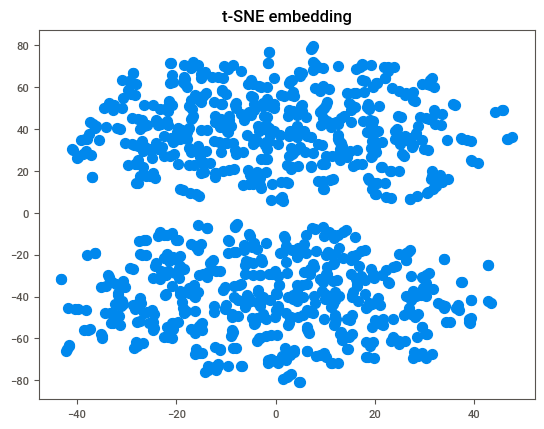

In [ ]:
# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', s=50)
plt.title('t-SNE embedding')
plt.show()

# VIII. Task description


**Background**:
Meeter, an online dating app, is preparing a new marketing strategy, and would like to deploy “smart”, i.e. targeted, commercials for their biggest customer groups. Thus, they ran a set of speed dating events, and collected data

**Goal**:
find out what are the typical user profiles, their characteristics and traits, and visualize those results

**Audience**:
Meeter board of directors
Data source: http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/

# Expected deliverables

**Programmer:**
* Get the data
* Upload it to your tool of choice
* Run clustering algorithm (but other than K-means) on a modified subset of variables (at least 3 different variables) (+1 point)
* Run PCA to visualize your results (+1 point)
* Run t-SNE to visualize your results (+1 point)
* Provide results in digestible manner to the rest of the team (+2 points)

**Theoretician:**
Answer one question (selected at random) out of:
* K-Means and K-Medoids
* DBSCAN
* Hierarchical Clustering
* Principal Component Analysis
* t-SNE

Proposed reading:
* The Elements of Statistical Learning
* An Introduction to Statistical Learning
* 3Blue1Brown: Essence of Linear Algebra (YouTube)

**Presenter:**
* Gather results from the programmer
* Collect sufficient knowledge from theoretician to answer potential technical * questions from the audience
* Prepare a presentation
* Deliver the presentation at our next meeting